In [2]:
import numpy as np
import matplotlib.pyplot as plt

import math
import scipy.sparse as sps

import jlinops
import sampi

In [3]:
648*648

419904

In [4]:
jlinops.satellite()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
ground_truth = jlinops.graecolatinsquare(which=3)
#ground_truth = jlinops.cameraman()
img_shape = ground_truth.shape
print(img_shape)
noise_sigma = 0.1
n = math.prod(ground_truth.shape)
#F = jlinops.IdentityOperator((n,n))
F = jlinops.Gaussian2DBlurOperator(img_shape, blur_sigma=4.0)
noise_var = noise_sigma**2
np.random.seed(0)
noisy_signal = F.matvec(ground_truth.flatten()) + noise_sigma*np.random.normal(size=n)

(648, 648)


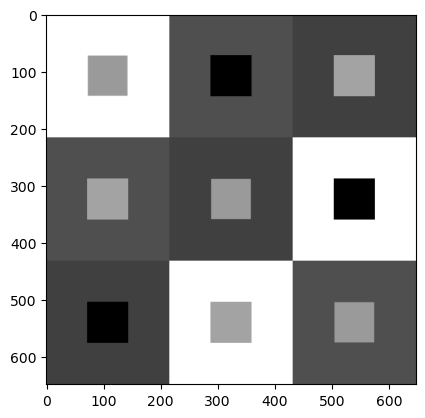

In [6]:
plt.imshow(ground_truth, cmap="gray")
plt.show()

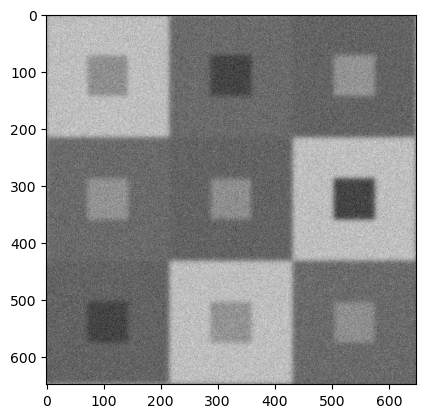

In [7]:
plt.imshow(noisy_signal.reshape(img_shape), cmap="gray")
plt.show()

In [31]:
W = np.ones(n)/np.linalg.norm(np.ones(n))
W = jlinops.MatrixLinearOperator(W)

R = jlinops.Neumann2D(img_shape)
def Rpinv_factory(theta):
    return jlinops.CGWeightedNeumann2DPinvOperator(img_shape, weights=1.0/np.sqrt(theta), tol=1e-2)




# R, W = jlinops.first_order_derivative_2d(img_shape, boundary="none")
# W = jlinops.MatrixLinearOperator(W)
# R = jlinops.MatrixLinearOperator(R)
# def Rpinv_factory(theta):
#     Rtilde = jlinops.MatrixLinearOperator(sps.diags(1.0/np.sqrt(theta)) @ R.A)
#     return jlinops.BandedCholeskyPinvOperator(Rtilde, delta=1e-5)

pdata = {
    "W": W,
    "Rpinv_factory": Rpinv_factory,
}

In [44]:
# Prior parameters
reg_lambda = 1e1
vartheta = 2/(reg_lambda**2)
hyperparams = {
    "prior": {
        "r": 1.0,
        "beta": 1.5 + 1e-2,
        "vartheta": vartheta,
    },
    # "noise_var": {
    #     "r": -1.0,
    #     "beta": 1,
    #     "vartheta": 1e-4,
    # }
}


# # Prior parameters
# hyperparams = {
#     "prior": {
#         "r": -1.0,
#         "beta": 1.0,
#         "vartheta": 1e-3,
#     },
#     # "noise_var": {
#     #     "r": -1.0,
#     #     "beta": 1,
#     #     "vartheta": 1e-4,
#     # }
# }



# Create solver
solver = sampi.IASSolver(F, R, noisy_signal, hyperparams, noise_var=noise_var, pdata=pdata)

In [47]:
data = solver.solve(max_iters=10, priorconditioning=True, early_stopping=True, warmstarting=True, eps=1e-3)

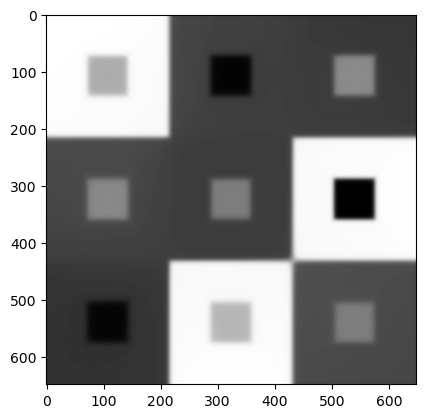

In [48]:
plt.imshow( data["x"].reshape(img_shape) , cmap="gray")
plt.show()

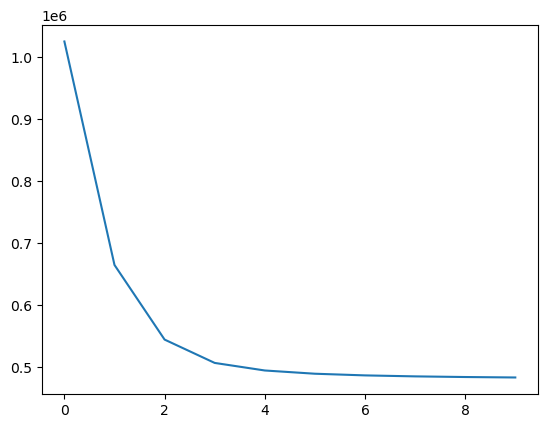

In [49]:
plt.plot(data["obj_vals"])
plt.show()

In [10]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

NameError: name 'data' is not defined

In [51]:
data = solver.solve(max_iters=10, priorconditioning=False, early_stopping=True, warmstarting=True, eps=1e-3)

In [8]:
img_shape

(648, 648)

In [9]:
plt.imshow( data["x"].reshape(img_shape) , cmap="gray")
plt.show()

NameError: name 'data' is not defined

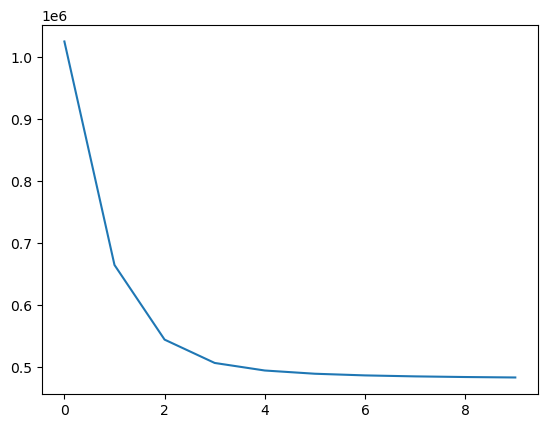

In [54]:
plt.plot(data["obj_vals"])
plt.show()

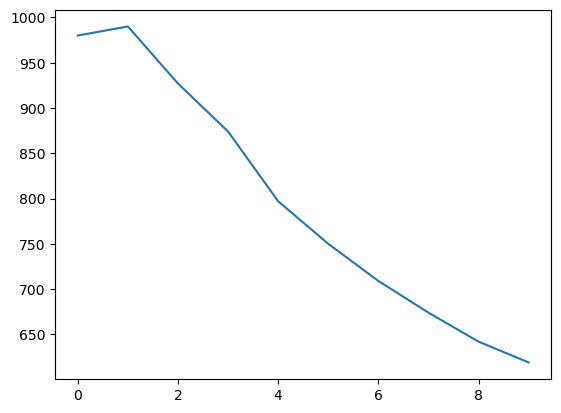

In [55]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

In [19]:
data = solver.solve(max_iters=10, priorconditioning=True, early_stopping=True, warmstarting=True, eps=1e-3)

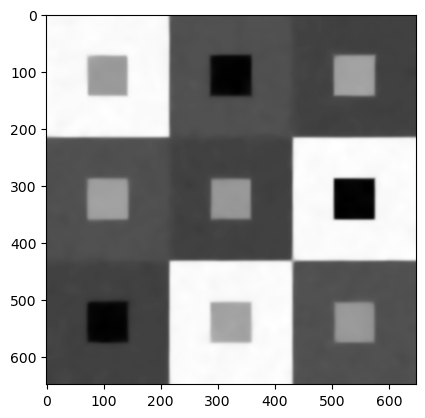

In [38]:
plt.imshow( data["x"].reshape(img_shape) , cmap="gray")
plt.show()

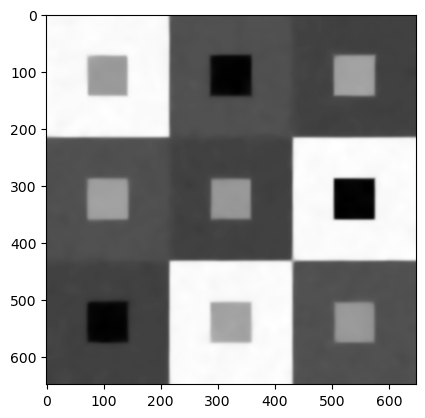

In [39]:
plt.imshow( data["x"].reshape(img_shape) , cmap="gray")
plt.show()

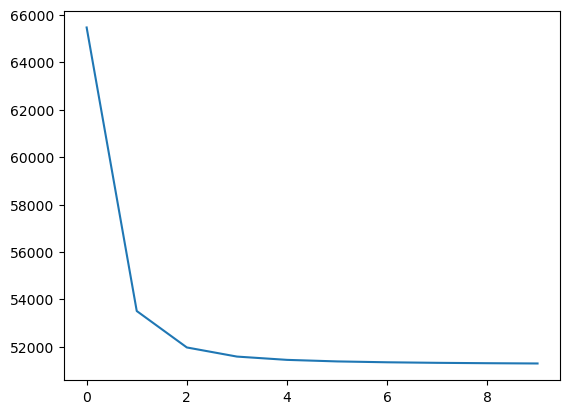

In [21]:
plt.plot(data["obj_vals"])
plt.show()

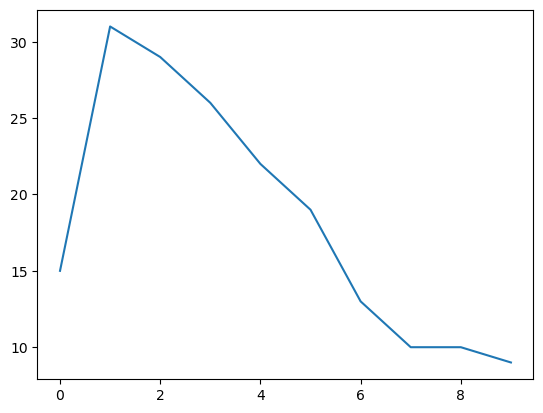

In [22]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

In [42]:
data = solver.solve(max_iters=3, priorconditioning=False, early_stopping=True, warmstarting=True, eps=1e-3)

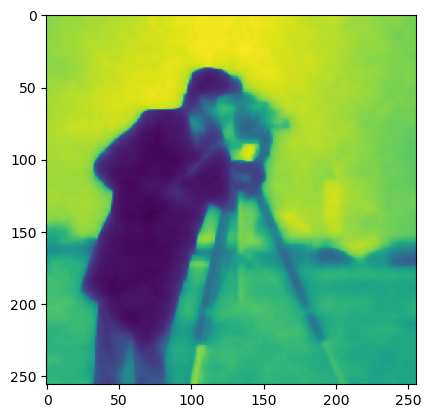

In [51]:
plt.imshow( data["x"].reshape(img_shape) )
plt.show()

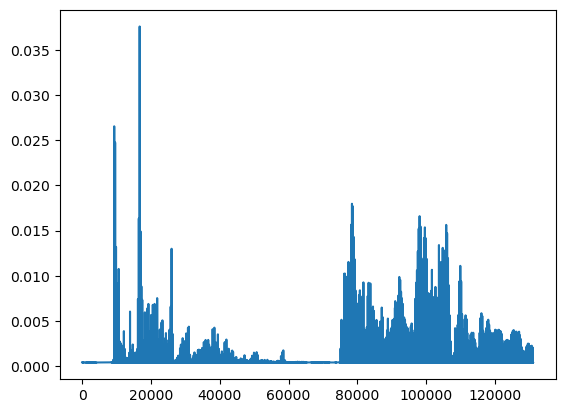

In [52]:
plt.plot(data["theta"])
plt.show()

In [45]:
# data = solver.solve(max_iters=100, priorconditioning=True, early_stopping=True, warmstarting=True, eps=1e-3)

In [46]:
data = solver.solve(max_iters=5, priorconditioning=True, x0=data["x"], early_stopping=True, warmstarting=True, eps=1e-3)

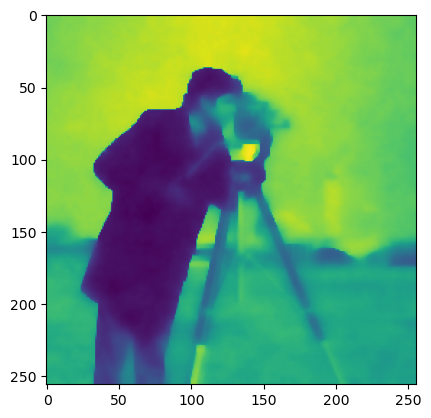

In [47]:
plt.imshow( data["x"].reshape(img_shape) )
plt.show()

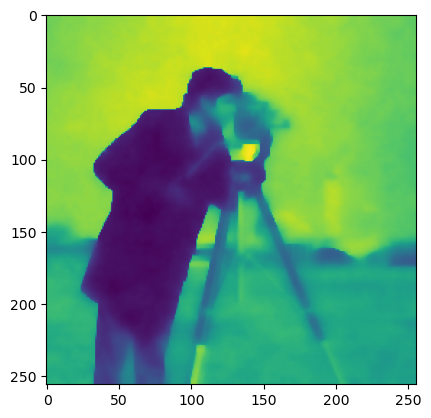

In [48]:
plt.imshow( data["x"].reshape(img_shape) )
plt.show()

In [37]:
np.sum(data["n_cg_its_per_iteration"])

104

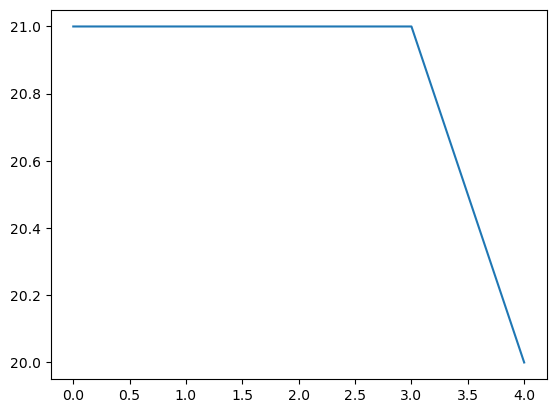

In [39]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

In [62]:
np.sum(data["n_cg_its_per_iteration"])

992

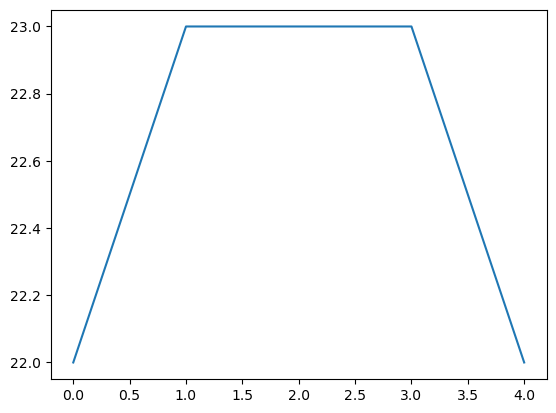

In [27]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

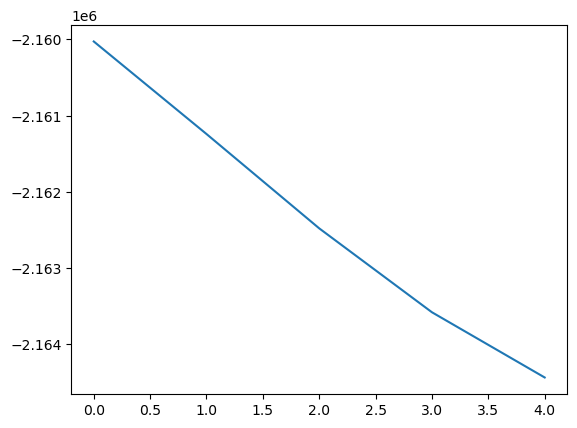

In [28]:
plt.plot(data["obj_vals"])
plt.show()

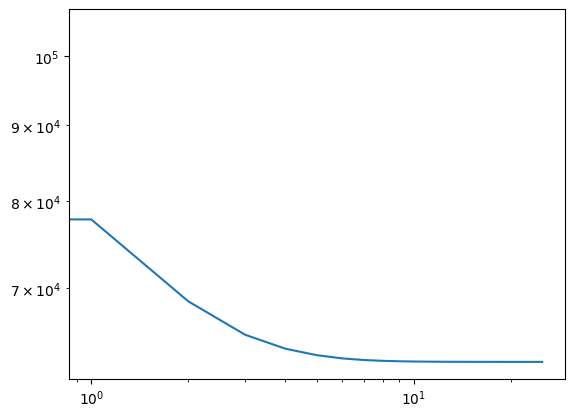

In [57]:
plt.loglog(data["obj_vals"])
#plt.loglog(data["obj_vals"] - 1.5*np.amin(data["obj_vals"]))
plt.show()

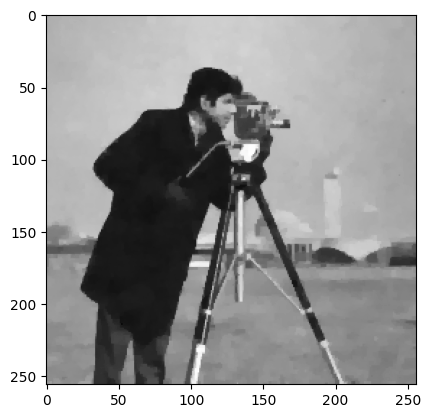

In [58]:
plt.imshow(data["x"].reshape(img_shape), cmap="gray")
plt.show()

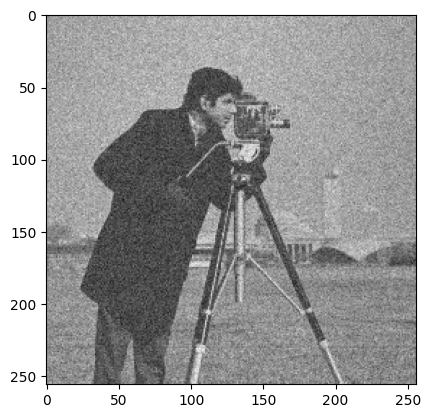

In [59]:
plt.imshow(noisy_signal.reshape(img_shape), cmap="gray")
plt.show()